In [1]:
#Import Library yang dibutuhkan
import pandas as pd #manipulasi data dan analisis data seperti excel
import numpy as np #operasi numerik dan array 
import cv2 #Membaca, memanipulasi, dan menganalisis gambar.
import os #Mengimpor gambar, berinteraksi dengan sistem file.
import csv #Mengelola data dalam format CSV.
from sklearn.model_selection import train_test_split #Membagi data menjadi set pelatihan dan pengujian,
from sklearn.neighbors import KNeighborsClassifier# membuat dan mengevaluasi model klasifikasi (K-Nearest Neighbors)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  #mencari akurasi, membuat laporan klasifikasi, dan membuat confsuion matrix
import seaborn as sns #Memvisualisasikan data statistik, digunakan untuk membuat heatmap dari confusion matrix
import matplotlib.pyplot as plt #Memungkinkan pembuatan visualisasi grafis dan plot

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


RESIZE MENTAH

In [3]:
# from PIL import Image

# # Direktori awal
# input_directory = '/content/drive/MyDrive/pisangmasedit/mentah'

# # Direktori tujuan untuk menyimpan gambar yang diresize
# output_directory = '/content/drive/MyDrive/pisangmaseditcrop/mentah'

# # Ukuran yang diinginkan untuk gambar yang diresize
# target_size = (200, 200)

# # Pastikan direktori tujuan sudah ada
# os.makedirs(output_directory, exist_ok=True)

# # Loop melalui setiap file gambar di direktori awal
# for filename in os.listdir(input_directory):
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         # Baca gambar
#         image_path = os.path.join(input_directory, filename)
#         img = Image.open(image_path)

#         # Resize gambar
#         resized_img = img.resize(target_size)

#         # Simpan gambar yang diresize ke direktori tujuan
#         output_path = os.path.join(output_directory, filename)
#         resized_img.save(output_path)

# print("Proses resize mentah selesai.")

RESIZE MATANG

In [4]:
# # Direktori awal
# input_directory = '/content/drive/MyDrive/pisangmasedit/matang'

# # Direktori tujuan untuk menyimpan gambar yang diresize
# output_directory = '/content/drive/MyDrive/pisangmaseditcrop/matang'

# # Ukuran yang diinginkan untuk gambar yang diresize
# target_size = (200, 200)

# # Pastikan direktori tujuan sudah ada
# os.makedirs(output_directory, exist_ok=True)

# # Loop melalui setiap file gambar di direktori awal
# for filename in os.listdir(input_directory):
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         # Baca gambar
#         image_path = os.path.join(input_directory, filename)
#         img = Image.open(image_path)

#         # Resize gambar
#         resized_img = img.resize(target_size)

#         # Simpan gambar yang diresize ke direktori tujuan
#         output_path = os.path.join(output_directory, filename)
#         resized_img.save(output_path)

# print("Proses resize matang selesai.")

RESIZE SANGAT MATANG

In [5]:
# # Direktori awal
# input_directory = '/content/drive/MyDrive/pisangmasedit/sangatmatang'

# # Direktori tujuan untuk menyimpan gambar yang diresize
# output_directory = '/content/drive/MyDrive/pisangmaseditcrop/sangatmatang'

# # Ukuran yang diinginkan untuk gambar yang diresize
# target_size = (200, 200)

# # Pastikan direktori tujuan sudah ada
# os.makedirs(output_directory, exist_ok=True)

# # Loop melalui setiap file gambar di direktori awal
# for filename in os.listdir(input_directory):
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         # Baca gambar
#         image_path = os.path.join(input_directory, filename)
#         img = Image.open(image_path)

#         # Resize gambar
#         resized_img = img.resize(target_size)

#         # Simpan gambar yang diresize ke direktori tujuan
#         output_path = os.path.join(output_directory, filename)
#         resized_img.save(output_path)

# print("Proses resize sangat matang selesai.")

MENTAH

In [6]:
path = '/content/drive/MyDrive/pisangmaseditcrop/mentah'  # path ke direktori gambar
data = os.listdir(path)  # mendapatkan daftar gambar dalam direktori
rataR = []  # inisialisasi list untuk menyimpan nilai rata-rata R
rataG = []  # inisialisasi list untuk menyimpan nilai rata-rata G
rataB = []  # inisialisasi list untuk menyimpan nilai rata-rata B
rataH = []  # inisialisasi list untuk menyimpan nilai rata-rata H
rataS = []  # inisialisasi list untuk menyimpan nilai rata-rata S
rataV = []  # inisialisasi list untuk menyimpan nilai rata-rata V
label = []  # inisialisasi list untuk menyimpan label

def normalize_rgb(image):
    return image / 255.0

def calculate_hsv(normalized_r, normalized_g, normalized_b):
    v = np.max([normalized_r, normalized_g, normalized_b])

    s = (v - np.min([normalized_r, normalized_g, normalized_b])) / v if v != 0 else 0

    if v == 0:
        h = 0
    elif v == normalized_r:
        h = 60 * (normalized_g - normalized_b) / (v - np.min([normalized_r, normalized_g, normalized_b]))
    elif v == normalized_g:
        h = 120 + 60 * (normalized_b - normalized_r) / (v - np.min([normalized_r, normalized_g, normalized_b]))
    else:
        h = 240 + 60 * (normalized_r - normalized_g) / (v - np.min([normalized_r, normalized_g, normalized_b]))

    h = h if h >= 0 else h + 360
    return h, s, v

#Loop untuk pengelolaan setiap gambar
for image_name in data:
    image_path = os.path.join(path, image_name)
    image = cv2.imread(image_path)

    # Konversi BGR ke RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    normalized_image = normalize_rgb(image_rgb)

    mean_rgb = np.mean(normalized_image, axis=(0, 1))
    mean_hsv = calculate_hsv(*mean_rgb)

    rataR.append(mean_rgb[0])
    rataG.append(mean_rgb[1])
    rataB.append(mean_rgb[2])
    rataH.append(mean_hsv[0])
    rataS.append(mean_hsv[1])
    rataV.append(mean_hsv[2])
    label.append(1)

# Membuat DataFrame untuk setiap channel warna dan label
data1 = pd.DataFrame(rataR, columns=['MeanR'])
data2 = pd.DataFrame(rataG, columns=['MeanG'])
data3 = pd.DataFrame(rataB, columns=['MeanB'])
data4 = pd.DataFrame(rataH, columns=['MeanH'])
data5 = pd.DataFrame(rataS, columns=['MeanS'])
data6 = pd.DataFrame(rataV, columns=['MeanV'])
data7 = pd.DataFrame(label, columns=['Kematangan'])

# Menggabungkan semua DataFrame menjadi satu
listdata1 = [data1, data2, data3, data4, data5, data6, data7]
gabung1 = pd.concat(listdata1, axis=1)

MATANG

In [7]:
path = '/content/drive/MyDrive/pisangmaseditcrop/matang'  # path ke direktori gambar
data = os.listdir(path)  # mendapatkan daftar gambar dalam direktori
rataR = []  # inisialisasi list untuk menyimpan nilai rata-rata R
rataG = []  # inisialisasi list untuk menyimpan nilai rata-rata G
rataB = []  # inisialisasi list untuk menyimpan nilai rata-rata B
rataH = []  # inisialisasi list untuk menyimpan nilai rata-rata H
rataS = []  # inisialisasi list untuk menyimpan nilai rata-rata S
rataV = []  # inisialisasi list untuk menyimpan nilai rata-rata V
label = []  # inisialisasi list untuk menyimpan label

def normalize_rgb(image):
    return image / 255.0

def calculate_hsv(normalized_r, normalized_g, normalized_b):
    v = np.max([normalized_r, normalized_g, normalized_b])

    s = (v - np.min([normalized_r, normalized_g, normalized_b])) / v if v != 0 else 0

    if v == 0:
        h = 0
    elif v == normalized_r:
        h = 60 * (normalized_g - normalized_b) / (v - np.min([normalized_r, normalized_g, normalized_b]))
    elif v == normalized_g:
        h = 120 + 60 * (normalized_b - normalized_r) / (v - np.min([normalized_r, normalized_g, normalized_b]))
    else:
        h = 240 + 60 * (normalized_r - normalized_g) / (v - np.min([normalized_r, normalized_g, normalized_b]))

    h = h if h >= 0 else h + 360
    return h, s, v

for image_name in data:
    image_path = os.path.join(path, image_name)
    image = cv2.imread(image_path)

    # Konversi BGR ke RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    normalized_image = normalize_rgb(image_rgb)

    mean_rgb = np.mean(normalized_image, axis=(0, 1))
    mean_hsv = calculate_hsv(*mean_rgb)

    rataR.append(mean_rgb[0])
    rataG.append(mean_rgb[1])
    rataB.append(mean_rgb[2])
    rataH.append(mean_hsv[0])
    rataS.append(mean_hsv[1])
    rataV.append(mean_hsv[2])
    label.append(2)

# Membuat DataFrame untuk setiap channel warna dan label
data1 = pd.DataFrame(rataR, columns=['MeanR'])
data2 = pd.DataFrame(rataG, columns=['MeanG'])
data3 = pd.DataFrame(rataB, columns=['MeanB'])
data4 = pd.DataFrame(rataH, columns=['MeanH'])
data5 = pd.DataFrame(rataS, columns=['MeanS'])
data6 = pd.DataFrame(rataV, columns=['MeanV'])
data7 = pd.DataFrame(label, columns=['Kematangan'])

# Menggabungkan semua DataFrame menjadi satu
listdata2 = [data1, data2, data3, data4, data5, data6, data7]
gabung2 = pd.concat(listdata2, axis=1)

SANGATMATANG

In [8]:
path = '/content/drive/MyDrive/pisangmaseditcrop/sangatmatang'  # path ke direktori gambar
data = os.listdir(path)  # mendapatkan daftar gambar dalam direktori
rataR = []  # inisialisasi list untuk menyimpan nilai rata-rata R
rataG = []  # inisialisasi list untuk menyimpan nilai rata-rata G
rataB = []  # inisialisasi list untuk menyimpan nilai rata-rata B
rataH = []  # inisialisasi list untuk menyimpan nilai rata-rata H
rataS = []  # inisialisasi list untuk menyimpan nilai rata-rata S
rataV = []  # inisialisasi list untuk menyimpan nilai rata-rata V
label = []  # inisialisasi list untuk menyimpan label

def normalize_rgb(image):
    return image / 255.0

def calculate_hsv(normalized_r, normalized_g, normalized_b):
    v = np.max([normalized_r, normalized_g, normalized_b])

    s = (v - np.min([normalized_r, normalized_g, normalized_b])) / v if v != 0 else 0

    if v == 0:
        h = 0
    elif v == normalized_r:
        h = 60 * (normalized_g - normalized_b) / (v - np.min([normalized_r, normalized_g, normalized_b]))
    elif v == normalized_g:
        h = 120 + 60 * (normalized_b - normalized_r) / (v - np.min([normalized_r, normalized_g, normalized_b]))
    else:
        h = 240 + 60 * (normalized_r - normalized_g) / (v - np.min([normalized_r, normalized_g, normalized_b]))

    h = h if h >= 0 else h + 360
    return h, s, v

for image_name in data:
    image_path = os.path.join(path, image_name)
    image = cv2.imread(image_path)

    # Konversi BGR ke RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    normalized_image = normalize_rgb(image_rgb)

    mean_rgb = np.mean(normalized_image, axis=(0, 1))
    mean_hsv = calculate_hsv(*mean_rgb)

    rataR.append(mean_rgb[0])
    rataG.append(mean_rgb[1])
    rataB.append(mean_rgb[2])
    rataH.append(mean_hsv[0])
    rataS.append(mean_hsv[1])
    rataV.append(mean_hsv[2])
    label.append(3)

# Membuat DataFrame untuk setiap channel warna dan label
data1 = pd.DataFrame(rataR, columns=['MeanR'])
data2 = pd.DataFrame(rataG, columns=['MeanG'])
data3 = pd.DataFrame(rataB, columns=['MeanB'])
data4 = pd.DataFrame(rataH, columns=['MeanH'])
data5 = pd.DataFrame(rataS, columns=['MeanS'])
data6 = pd.DataFrame(rataV, columns=['MeanV'])
data7 = pd.DataFrame(label, columns=['Kematangan'])

# Menggabungkan semua DataFrame menjadi satu
listdata3 = [data1, data2, data3, data4, data5, data6, data7]
gabung3 = pd.concat(listdata3, axis=1)

SIMPAN KE CSV & XLSX

In [9]:
listdata = [gabung1, gabung2, gabung3]
total = pd.concat(listdata, ignore_index=True)
total.to_csv("pisangmas.csv", index=False)
total.to_excel('pisangmas.xlsx', index=False)

In [10]:
# Baca file CSV
dataframe = pd.read_csv('pisangmas.csv')

# Tampilkan DataFrame
print(dataframe)

        MeanR     MeanG     MeanB      MeanH     MeanS     MeanV  Kematangan
0    0.864156  0.865148  0.803384  60.963808  0.071392  0.865148           1
1    0.864277  0.868100  0.809944  63.944058  0.066992  0.868100           1
2    0.836837  0.837023  0.779028  60.191801  0.069287  0.837023           1
3    0.837483  0.841141  0.764401  62.859483  0.091233  0.841141           1
4    0.864963  0.869453  0.811261  64.628938  0.066929  0.869453           1
..        ...       ...       ...        ...       ...       ...         ...
235  0.838669  0.820168  0.803968  28.009685  0.041376  0.838669           3
236  0.865152  0.841623  0.817264  30.520948  0.055352  0.865152           3
237  0.820407  0.806514  0.798505  21.941557  0.026696  0.820407           3
238  0.846173  0.826662  0.814140  23.454939  0.037856  0.846173           3
239  0.846656  0.803295  0.758055  30.635864  0.104648  0.846656           3

[240 rows x 7 columns]


In [11]:
# Baca file CSV
dataframe = pd.read_csv('pisangmas.csv')

# Mengambil dua angka desimal dari belakang untuk setiap elemen
dataframe = dataframe.round(2)

# Menyimpan DataFrame yang sudah diubah ke file CSV
dataframe.to_csv('pisangmas_2angka.csv', index=False)

# Tampilkan DataFrame yang sudah diubah
print(dataframe)

     MeanR  MeanG  MeanB  MeanH  MeanS  MeanV  Kematangan
0     0.86   0.87   0.80  60.96   0.07   0.87           1
1     0.86   0.87   0.81  63.94   0.07   0.87           1
2     0.84   0.84   0.78  60.19   0.07   0.84           1
3     0.84   0.84   0.76  62.86   0.09   0.84           1
4     0.86   0.87   0.81  64.63   0.07   0.87           1
..     ...    ...    ...    ...    ...    ...         ...
235   0.84   0.82   0.80  28.01   0.04   0.84           3
236   0.87   0.84   0.82  30.52   0.06   0.87           3
237   0.82   0.81   0.80  21.94   0.03   0.82           3
238   0.85   0.83   0.81  23.45   0.04   0.85           3
239   0.85   0.80   0.76  30.64   0.10   0.85           3

[240 rows x 7 columns]


MODEL KNN

Laporan Klasifikasi:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.95      1.00      0.98        21
           3       1.00      0.92      0.96        12

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



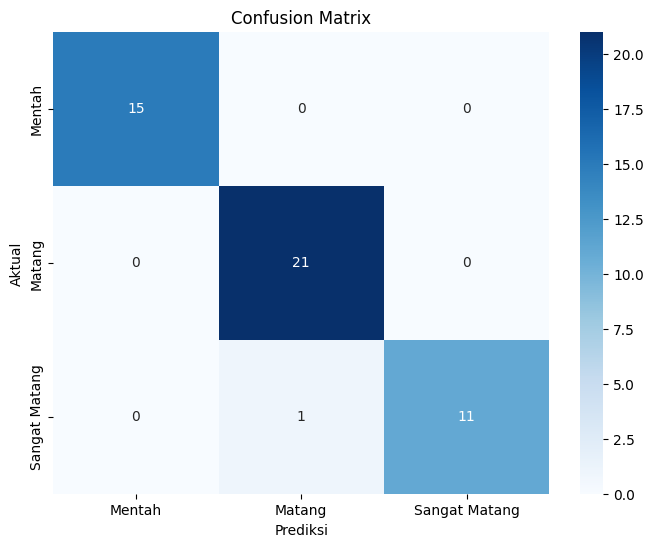

In [13]:
# Membaca data dari file CSV
# Gantilah 'nama_file.csv' dengan nama file CSV yang berisi tabel MeanR, MeanG, MeanB, MeanH, MeanS, MeanV, dan Kematangan
data = pd.read_csv('/content/pisangmas.csv')

# Pisahkan fitur dan label
X = data[['MeanR', 'MeanG', 'MeanB', 'MeanH', 'MeanS', 'MeanV']]
y = data['Kematangan']

# Membagi dataset menjadi data latih dan data uji dengan mempertahankan proporsi label yang sama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inisialisasi model KNN dengan k=2 dan menggunakan Euclidean distance
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

# Melatih model KNN
knn.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test)

# Menampilkan laporan klasifikasi
print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

# Melakukan prediksi pada data latih
y_train_pred = knn.predict(X_train)

# Menampilkan confusion matrix dengan seaborn heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = {1: 'Mentah', 2: 'Matang', 3: 'Sangat Matang'}
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()